In [ ]:
import fitsio
import numpy as np
import pylab as pl

from   astropy.table                 import Table
from   desitarget.sv1.sv1_targetmask import desi_mask, bgs_mask, mws_mask
from   desitarget.sv1.sv1_targetmask import scnd_mask

from   astropy.coordinates           import SkyCoord
from   astropy                       import units as u

In [7]:
# bxu      = Table.read('/global/cscratch1/sd/mjwilson/DESILBG/GOLD/DESILBG_BXU/desilbg_bxu.fits')                                                                                                                       
# gdrops   = Table.read('/global/cscratch1/sd/mjwilson/DESILBG/GOLD/DESILBG_G/desilbg_g.fits')                                                                                                                           
# tmg      = Table.read('/global/cscratch1/sd/mjwilson/DESILBG/GOLD/DESILBG_TMG/desilbg_tmg.fits')                                                                                                                       

scnd       = Table.read('/global/cfs/cdirs/desi/target/catalogs/dr9/0.52.0/targets/sv1/secondary/dark/sv1targets-dark-secondary.fits')
clauds     = Table.read('/global/cscratch1/sd/mjwilson/clauds/March2021/COSMOS_v9_v210225.fits')

In [49]:
# for x in scnd.dtype.names:
#     print(x)

hizsne = (scnd['SV1_SCND_TARGET'] & scnd_mask['HSC_HIZ_SNE']) != 0
scnd_yeche = scnd[(scnd['SV1_SCND_TARGET'] & scnd_mask['LBG_TOMOG_COSMOS_FINAL']) != 0 ]

scnd_bxu = scnd[(scnd['SV1_SCND_TARGET'] & scnd_mask['DESILBG_BXU_FINAL']) != 0 ]
scnd_g = scnd[(scnd['SV1_SCND_TARGET'] & scnd_mask['DESILBG_G_FINAL']) != 0 ]
scnd_tmg = scnd[(scnd['SV1_SCND_TARGET'] & scnd_mask['DESILBG_TMG_FINAL']) != 0 ]

# ism = (scnd['SV1_SCND_TARGET'] & scnd_mask['ISM_CGM_QGP']) != 0

print('\n\n')

for x in [yeche, scnd_tmg, scnd_bxu, scnd_g]:
    print(len(x))




12094
1983
12108
29361


In [14]:
sc_scnd_tmg     = SkyCoord(ra=scnd_tmg['RA'], dec=scnd_tmg['DEC'])
sc_clauds       = SkyCoord(ra=clauds['RA']*u.degree, dec=clauds['DEC']*u.degree)

idx, d2d, d3d   = sc_scnd_tmg.match_to_catalog_sky(sc_clauds)

scnd_tmg_clauds = clauds[idx]

0.0


In [16]:
np.mean(d2d.arcsecond < 1.0)

1.0

Text(0.5, 1.0, 'ADM: Smaller SCND_ORDER (i.e. higher up in the input) corresponds to higher priority.')

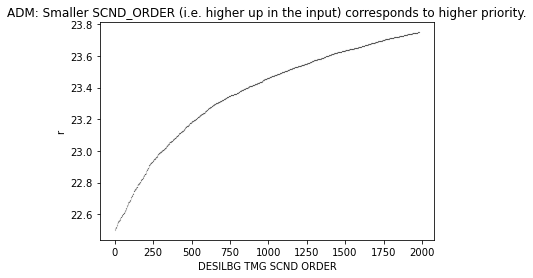

In [67]:
#  Smaller SCND_ORDER values (i.e. higher up in the input file of secondary targets) corresponds to higher priority.
pl.plot(scnd_tmg['SCND_ORDER'], scnd_tmg_clauds['r'], lw=0.0, c='k', marker='.', markersize=.1)

pl.xlabel('DESILBG TMG SCND ORDER')
pl.ylabel('r')

pl.title('ADM: Smaller SCND_ORDER (i.e. higher up in the input) corresponds to higher priority.')

In [ ]:
#  Smaller SCND_ORDER values (i.e. higher up in the input file of secondary targets) corresponds to higher priority.
pl.plot(scnd_tmg['SUBPRIORITY'], scnd_tmg_clauds['r'], lw=0.0, c='k', marker='.', markersize=1.)

pl.xlabel('DESILBG TMG SUBPRIORITY')
pl.ylabel('r')

pl.title('ADM: Smaller SCND_ORDER (i.e. higher up in the input) corresponds to higher priority.')

In [28]:
sc_scnd_bxu     = SkyCoord(ra=scnd_bxu['RA'], dec=scnd_bxu['DEC'])
sc_clauds       = SkyCoord(ra=clauds['RA']*u.degree, dec=clauds['DEC']*u.degree)

idx, d2d, d3d   = sc_scnd_bxu.match_to_catalog_sky(sc_clauds)

scnd_bxu_clauds = clauds[idx]

Text(0.5, 1.0, 'ADM: Smaller SCND_ORDER (i.e. higher up in the input) corresponds to higher priority.')

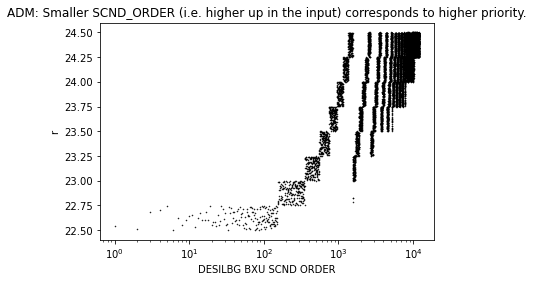

In [68]:
#  Smaller SCND_ORDER values (i.e. higher up in the input file of secondary targets) corresponds to higher priority.
pl.plot(scnd_bxu['SCND_ORDER'], scnd_bxu_clauds['r'], lw=0.0, c='k', marker='.', markersize=1)

pl.xlabel('DESILBG BXU SCND ORDER')
pl.ylabel('r')

pl.xscale('log')

pl.title('ADM: Smaller SCND_ORDER (i.e. higher up in the input) corresponds to higher priority.')

In [35]:
sc_scnd_g       = SkyCoord(ra=scnd_g['RA'], dec=scnd_g['DEC'])
sc_clauds       = SkyCoord(ra=clauds['RA']*u.degree, dec=clauds['DEC']*u.degree)

idx, d2d, d3d   = sc_scnd_g.match_to_catalog_sky(sc_clauds)

scnd_g_clauds   = clauds[idx]

Text(0.5, 1.0, 'ADM: Smaller SCND_ORDER (i.e. higher up in the input) corresponds to higher priority.')

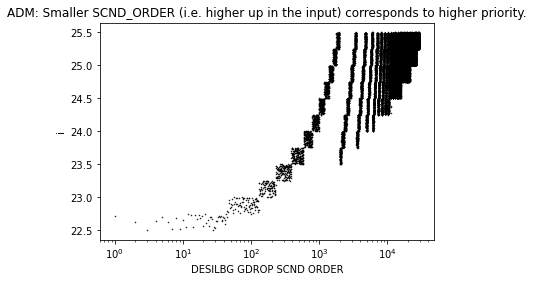

In [69]:
#  Smaller SCND_ORDER values (i.e. higher up in the input file of secondary targets) corresponds to higher priority.
pl.plot(scnd_g['SCND_ORDER'], scnd_g_clauds['i'], lw=0.0, c='k', marker='.', markersize=1)

pl.xlabel('DESILBG GDROP SCND ORDER')
pl.ylabel('i')

pl.xscale('log')

pl.title('ADM: Smaller SCND_ORDER (i.e. higher up in the input) corresponds to higher priority.')

In [52]:
sc_scnd_yeche   = SkyCoord(ra=scnd_yeche['RA'], dec=scnd_yeche['DEC'])
sc_clauds       = SkyCoord(ra=clauds['RA']*u.degree, dec=clauds['DEC']*u.degree)

idx, d2d, d3d   = sc_scnd_yeche.match_to_catalog_sky(sc_clauds)

scnd_yeche_clauds = clauds[idx]

Text(0.5, 1.0, 'ADM: Smaller SCND_ORDER (i.e. higher up in the input) corresponds to higher priority.')

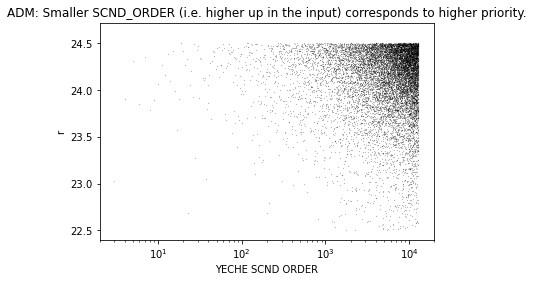

In [73]:
#  Smaller SCND_ORDER values (i.e. higher up in the input file of secondary targets) corresponds to higher priority.
pl.plot(scnd_yeche['SCND_ORDER'], scnd_yeche_clauds['r'], lw=0.0, c='k', marker='.', markersize=.2)

pl.xlabel('YECHE SCND ORDER')
pl.ylabel('r')

pl.xscale('log')

pl.xlim(2., 2.e4)

pl.title('ADM: Smaller SCND_ORDER (i.e. higher up in the input) corresponds to higher priority.')

Text(0, 0.5, 'u-g')

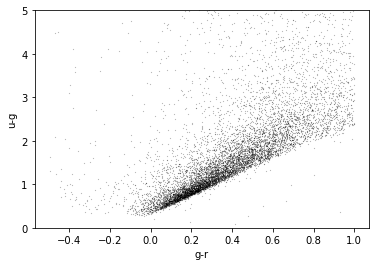

In [64]:
#  Smaller SCND_ORDER values (i.e. higher up in the input file of secondary targets) corresponds to higher priority.
pl.plot(scnd_yeche_clauds['g'] - scnd_yeche_clauds['r'], scnd_yeche_clauds['u'] - scnd_yeche_clauds['g'], lw=0.0, c='k', marker='.', markersize=.2)

pl.ylim(0.0, 5.0)

pl.xlabel('g-r')
pl.ylabel('u-g')

In [72]:
# raw_yeche = Table.read('/global/cscratch1/sd/yeche/catalog/CLAUDS_COSMOS_v9_r25.fits')

In [74]:
scnd_yeche

RA,DEC,PMRA,PMDEC,REF_EPOCH,OVERRIDE,FLUX_G,FLUX_R,FLUX_Z,PARALLAX,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,GAIA_ASTROMETRIC_EXCESS_NOISE,TARGETID,SV1_DESI_TARGET,SV1_SCND_TARGET,SCND_ORDER,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT
deg,deg,mas / yr,mas / yr,yr,,nanomaggy,nanomaggy,nanomaggy,mas,mag,mag,mag,,,,,,,,,
float64,float64,float32,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int32,float64,int64,int64,int64
149.45596639802005,0.8583379725806757,0.0,0.0,2015.5,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,247696891838488,4611686018427387904,72057594040025088,246016,0.05744254944856697,1,1800,100
150.0896020905773,1.1032546845016995,0.0,0.0,2015.5,False,0.5372593,0.74515426,0.45028216,0.0,0.0,0.0,0.0,0.0,39627811404646324,4611686018427387904,72057594040025088,251201,0.254134971318267,1,1800,100
151.15160100066936,1.9976992468447976,0.0,0.0,2015.5,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,247727120187535,4611686018427387904,72057594040025088,301252,0.16975710787521592,1,1800,100
149.8970104475294,1.2530957722285976,0.0,0.0,2015.5,False,0.3620843,0.47061023,-0.0009656777,0.0,0.0,0.0,0.0,0.0,39627817440251464,4611686018427387904,72057594040025088,384943,0.5535359936658885,1,1800,100
150.27700524313295,1.3457426272023258,0.0,0.0,2015.5,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,247708988211352,4611686018427387904,72057594040025088,480461,0.02087160209148009,1,1800,100
148.64554833346477,1.9188941281727772,0.0,0.0,2015.5,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,247727078244449,4611686018427387904,72057594040025088,592442,0.9974155259106608,1,1800,100
150.06433036256962,1.3344540035723873,0.0,0.0,2015.5,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,247708984017002,4611686018427387904,72057594042122240,132387,0.996548046506331,1,1800,100
150.56240104546907,1.4795194804954608,0.0,0.0,2015.5,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,247715032203368,4611686018427387904,72057594042122240,133055,0.7419815820079767,1,1800,100


In [75]:
scnd_bxu

RA,DEC,PMRA,PMDEC,REF_EPOCH,OVERRIDE,FLUX_G,FLUX_R,FLUX_Z,PARALLAX,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,GAIA_ASTROMETRIC_EXCESS_NOISE,TARGETID,SV1_DESI_TARGET,SV1_SCND_TARGET,SCND_ORDER,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT
deg,deg,mas / yr,mas / yr,yr,,nanomaggy,nanomaggy,nanomaggy,mas,mag,mag,mag,,,,,,,,,
float64,float64,float32,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int32,float64,int64,int64,int64
149.4617628929257,2.9903850477809484,0.0,0.0,2015.5,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243353203507200,4611686018427387904,36028797018963968,0,0.9892999103129667,1,1800,1
149.37526777692952,2.9556887260343148,0.0,0.0,2015.5,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243353203507201,4611686018427387904,36028797018963968,1,0.06487618519542293,1,1800,1
149.37250768438415,3.080247775303863,0.0,0.0,2015.5,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243353203507202,4611686018427387904,36028797018963968,2,0.49978301431612904,1,1800,1
149.26462324656055,3.138785382887629,0.0,0.0,2015.5,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243359239110656,4611686018427387904,36028797018963968,3,0.44428965530800146,1,1800,1
149.40201064798677,3.188692373436244,0.0,0.0,2015.5,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243359239110657,4611686018427387904,36028797018963968,4,0.33676746961939164,1,1800,1
149.2142386139038,3.035434124404831,0.0,0.0,2015.5,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243353199312896,4611686018427387904,36028797018963968,5,0.24580003388597704,1,1800,1
149.21004001927372,3.1048311728256377,0.0,0.0,2015.5,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243353199312897,4611686018427387904,36028797018963968,6,0.23510692212412476,1,1800,1
149.06917248324245,3.295965274880494,0.0,0.0,2015.5,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243359234916352,4611686018427387904,36028797018963968,7,0.5864241317089871,1,1800,1


In [ ]:
sc_scnd_yeche     = SkyCoord(ra=scnd_yeche['RA'], dec=scnd_yeche['DEC'])
sc_bxu            = SkyCoord(ra=scnd_bxu['RA'], dec=scnd_bxu['DEC'])

idx, d2d, d3d     = sc_scnd_yeche.match_to_catalog_sky(sc_clauds)

scnd_yeche_bxu    = scnd_bxu[idx][]

scnd_yeche
scnd_bxu